# 손글씨 인식 ANN 실습

In [11]:
# 데이터 불러오기
import keras
from keras.datasets import  mnist
from keras.models import Sequential # ?
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.utils import np_utils

In [21]:
batch_size = 128
num_classes = 10 # 0 부터 9 까지 10개.
epochs = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# cateforical_crossentry function은 다중 분류 손실함수. one-hor encoding class임.
# 즉 출력값이 one-hot encoding 된 결과로 나오고 실특 결과와의 비교시에도 실특 결과는 one-hot encoding 형태로 구성된다.
# 네트워크 레이어 구성시 마지막에 Dense(n, activation='softmax')로 n개의 클래스 별로 positive probability가 나오게 된다.
# metrix는 평가 기준이 된다. 모델의 학습에는 영향을 미치지 않지만 학습 과정 중에 제대로 학습되고 있는지 살펴보는 용도.
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train, y_train, batch_size= batch_size, epochs= epochs, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 4s 12ms/step - loss: 0.2942 - accuracy: 0.9123 - val_loss: 0.1251 - val_accuracy: 0.9631
Epoch 2/10
329/329 [==============================] - 4s 11ms/step - loss: 0.1153 - accuracy: 0.9657 - val_loss: 0.1083 - val_accuracy: 0.9681
Epoch 3/10
329/329 [==============================] - 4s 11ms/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.1007 - val_accuracy: 0.9694
Epoch 4/10
329/329 [==============================] - 4s 11ms/step - loss: 0.0634 - accuracy: 0.9795 - val_loss: 0.0985 - val_accuracy: 0.9729
Epoch 5/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0496 - accuracy: 0.9836 - val_loss: 0.0873 - val_accuracy: 0.9747
Epoch 6/10
329/329 [==============================] - 4s 11ms/step - loss: 0.0427 - accuracy: 0.9860 - val_loss: 0.0954 - val_accuracy: 0.9731
Epoch 7/10
329/329 [==============================] - 4s 12ms/step - loss: 0.0332 - accuracy: 0.9887 - val_loss: 0.0999 - val_accuracy: 0.9743

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.09123771637678146
Test accuracy:  0.9768000245094299


In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(1, len(acc) + 1)
epoch_range

range(1, 11)

<Figure size 432x288 with 0 Axes>

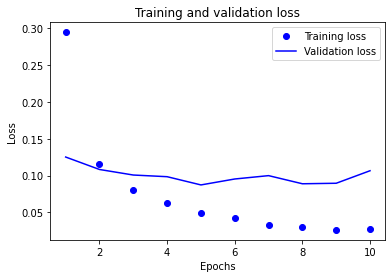

<Figure size 432x288 with 0 Axes>

In [34]:
# 손실함수 그래프
plt.plot(epoch_range, loss, 'bo', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.figure()

<Figure size 432x288 with 0 Axes>

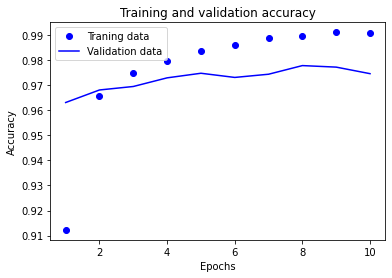

<Figure size 432x288 with 0 Axes>

In [37]:
# 정확도 그래프
plt.plot(epoch_range, acc, 'bo', label='Training acc')
plt.plot(epoch_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Traning data', 'Validation data'])
plt.figure()

# 손글씨 인식 CNN 실습

In [43]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, pooling
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape) # 60000만 개의 객체, 가로X세로 28X28 = 784화소 해상도의 흑백 사진.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


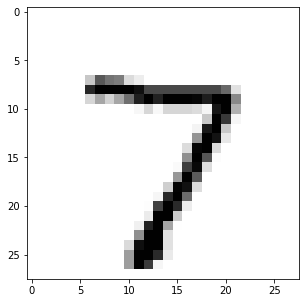

In [46]:
# 부록. mnist 데이터가 어떻게 생겼는지 한번 보자.
plt.figure(figsize=(5,5))
image = np.reshape(x_test[0], [28,28])
plt.imshow(image, cmap='Greys')
plt.show()

In [52]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [55]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
print(model.output_shape)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

(None, 26, 26, 32)


In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2068 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0846 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0652 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0526 - accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0480 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0406 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0370 - accuracy: 0.9879
Epoch 8/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0331 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 10/10
1875/1875 [==============================] - 90

<Figure size 432x288 with 0 Axes>

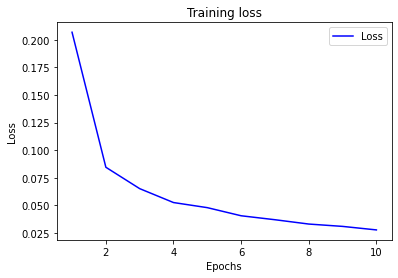

<Figure size 432x288 with 0 Axes>

In [59]:
# 손실함수 그래프 그리기
acc = history.history['accuracy']
loss = history.history['loss']
epoch_range = range(1, len(acc)+1)
epoch_range
plt.plot(epoch_range, loss, 'b', label= "Training loss")
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss'])
plt.figure()

<Figure size 432x288 with 0 Axes>

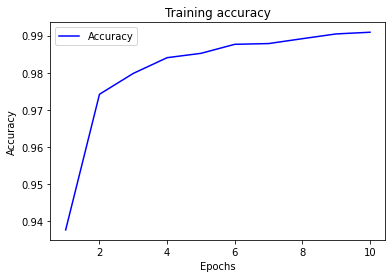

<Figure size 432x288 with 0 Axes>

In [61]:
# 정확도 그래프 그리기
plt.plot(epoch_range, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.figure()

# 과제
## cifar10 데이터 집합을 활용해 이미지 인식 ANN/CNN 코드 작성하기

In [124]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [80]:
print(x_train.shape, x_test.shape)
print(x_test[0])
# train set은 5000개, test set은 1000개의 data가 있다.
# 가로 세로 각각 32bit의, RGB(3)로 색상을 가진 데이터임을 알 수 있다.

(50000, 32, 32, 3) (10000, 32, 32, 3)
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


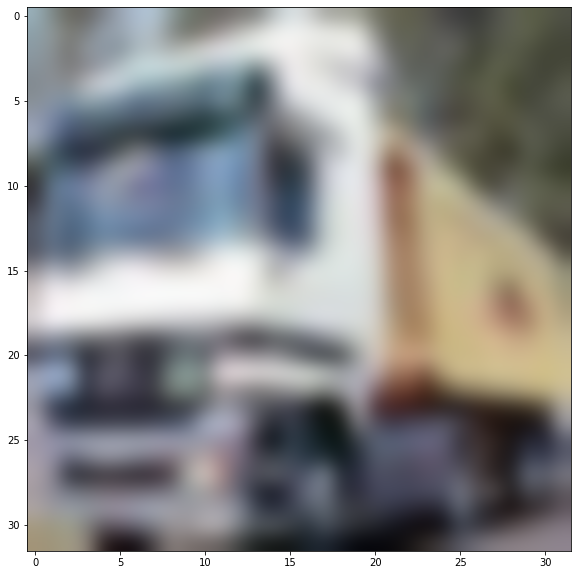

In [85]:
# 부록. cifar 데이터가 어떻게 생겼는지 한번 보자.
x_train_for_test = x_train.reshape(150000, 32*32)
plt.figure(figsize=(10,10))
plt.imshow(x_train[1], interpolation='bicubic')
plt.show()

In [87]:
x_train_1 = x_train.astype('float32')
x_test_1 = x_test.astype('float32')
x_train_1 /= 255
x_test_1 /= 255
y_train_1 = np_utils.to_categorical(y_train, 10)
y_test_1 = np_utils.to_categorical(y_test, 10)

In [88]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
print(model.output_shape)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

(None, 30, 30, 32)


In [119]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_1, y_train_1, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
 121/1563 [=>............................] - ETA: 1:16 - loss: 2.1200 - accuracy: 0.2033

KeyboardInterrupt: 

In [95]:
# 앞서 minist의 CNN을 그대로 따오더라도 학습은 된다. 하지만 성능이 매우 좋지 못하다.

In [125]:
x_train_2 = x_train.astype('float32')
x_test_2 = x_test.astype('float32')
x_train_2 /= 255
x_test_2 /= 255
y_train_2 = np_utils.to_categorical(y_train, 10)
y_test_2 = np_utils.to_categorical(y_test, 10)

In [127]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32,32,3)))
print(model.output_shape)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

(None, 30, 30, 128)


In [128]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_2, y_train_2, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
  45/1563 [..............................] - ETA: 7:18 - loss: 2.2874 - accuracy: 0.1236

KeyboardInterrupt: 

In [ ]:
# 컴퓨터가 고통스러워해서 포기.